In [1]:
import tensorflow as tf

# import os
import math
import numpy as np

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

from IPython.display import display

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL

from ipynb.fs.full.dataset import *
from ipynb.fs.full.moduel import *

2022-10-19 12:08:31.096164: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
test_dir = "./dataset/test"
test_img_paths = test_imgs(test_dir)
model_weight_dir = "./model_weights/ckpt"
model = get_model(upscale_factor=upscale_factor, channels=1)
model.summary()
model.load_weights(model_weight_dir)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1664        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

__________________________________________________________________________________________________


2022-10-19 12:08:32.327806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:08:32.331386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:08:32.331473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:08:32.331740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [45]:
def plot_results(img, prefix, title):
    """Plot the result with zoom-in area."""
    img_array = img_to_array(img)
    img_array = img_array.astype("float32") / 255.0

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots()
    im = ax.imshow(img_array[::-1], origin="lower")

    plt.title(title)
    # zoom-factor: 3, location: upper-left
    axins = zoomed_inset_axes(ax, 4, loc=3)
    axins.imshow(img_array[::-1], origin="lower")

    # Specify the limits.
    x1, x2, y1, y2 = 75, 160, 165, 180
    # Apply the x-limits.
    axins.set_xlim(x1, x2)
    # Apply the y-limits.
    axins.set_ylim(y1, y2)

    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="blue")
    plt.savefig(str(prefix) + "-" + title + ".png")
#     plt.show()


def get_lowres_image(img, upscale_factor):
    """Return low-resolution image to use as model input."""
    return img.resize(
        (img.size[0] // upscale_factor, img.size[1] // upscale_factor),
        PIL.Image.BICUBIC,
    )


def upscale_image(model, img):
    """Predict the result based on input image and restore the image as RGB."""
    ycbcr = img.convert("YCbCr")
    y, cb, cr = ycbcr.split()
    y = img_to_array(y)
    y = y.astype("float32") / 255.0

    input = np.expand_dims(y, axis=0)
    out = model.predict(input)

    out_img_y = out[0]
    out_img_y *= 255.0

    # Restore the image in RGB color space.
    out_img_y = out_img_y.clip(0, 255)
    out_img_y = out_img_y.reshape((np.shape(out_img_y)[0], np.shape(out_img_y)[1]))
    out_img_y = PIL.Image.fromarray(np.uint8(out_img_y), mode="L")
    out_img_cb = cb.resize(out_img_y.size, PIL.Image.BICUBIC)
    out_img_cr = cr.resize(out_img_y.size, PIL.Image.BICUBIC)
    out_img = PIL.Image.merge("YCbCr", (out_img_y, out_img_cb, out_img_cr)).convert(
        "RGB"
    )
    return out_img

1/1 [==============================] - 0s 10ms/step
PSNR of low resolution image and high resolution image is 24.4406
PSNR of predict and high resolution is 26.5427
PSNR improvement between low resolution and prediction 2.1021
1/1 [==============================] - 0s 10ms/step
PSNR of low resolution image and high resolution image is 25.4841
PSNR of predict and high resolution is 27.9286
PSNR improvement between low resolution and prediction 2.4445
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high resolution image is 27.2648
PSNR of predict and high resolution is 28.8630
PSNR improvement between low resolution and prediction 1.5983
1/1 [==============================] - 0s 10ms/step
PSNR of low resolution image and high resolution image is 24.8476
PSNR of predict and high resolution is 27.0842
PSNR improvement between low resolution and prediction 2.2366
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high reso

/tmp/ipykernel_186708/3262801850.py:35: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  PIL.Image.BICUBIC,
/tmp/ipykernel_186708/3262801850.py:56: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  out_img_cb = cb.resize(out_img_y.size, PIL.Image.BICUBIC)
/tmp/ipykernel_186708/3262801850.py:57: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  out_img_cr = cr.resize(out_img_y.size, PIL.Image.BICUBIC)


PSNR of low resolution image and high resolution image is 26.2594
PSNR of predict and high resolution is 27.7466
PSNR improvement between low resolution and prediction 1.4872
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high resolution image is 25.5161
PSNR of predict and high resolution is 27.4348
PSNR improvement between low resolution and prediction 1.9188
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high resolution image is 24.8446
PSNR of predict and high resolution is 26.9283
PSNR improvement between low resolution and prediction 2.0837
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high resolution image is 25.6556
PSNR of predict and high resolution is 27.8895
PSNR improvement between low resolution and prediction 2.2339
1/1 [==============================] - 0s 9ms/step
PSNR of low resolution image and high resolution image is 25.5751
PSNR of predict and high resol

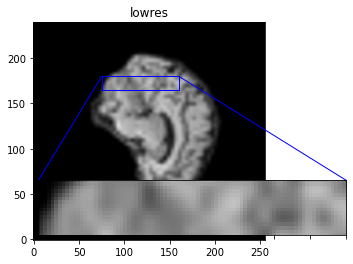

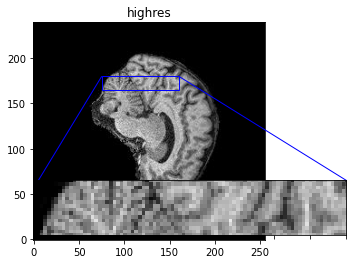

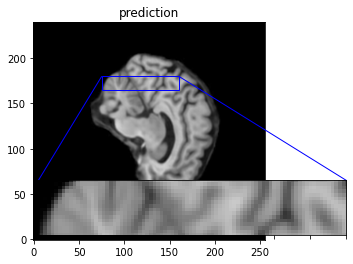

In [46]:
total_bicubic_psnr = 0.0
total_test_psnr = 0.0

for index, test_img_path in enumerate(test_img_paths[0:-1:300]):
    
    img = load_img(test_img_path)
    lowres_input = get_lowres_image(img, upscale_factor)
    w = lowres_input.size[0] * upscale_factor
    h = lowres_input.size[1] * upscale_factor
    highres_img = img.resize((w, h))
    prediction = upscale_image(model, lowres_input)
    lowres_img = lowres_input.resize((w, h))
    lowres_img_arr = img_to_array(lowres_img)
    highres_img_arr = img_to_array(highres_img)
    predict_img_arr = img_to_array(prediction)
    bicubic_psnr = tf.image.psnr(lowres_img_arr, highres_img_arr, max_val=255)
    test_psnr = tf.image.psnr(predict_img_arr, highres_img_arr, max_val=255)

    total_bicubic_psnr += bicubic_psnr
    total_test_psnr += test_psnr

    print(
        "PSNR of low resolution image and high resolution image is %.4f" % bicubic_psnr
    )
    print("PSNR of predict and high resolution is %.4f" % test_psnr)
    print("PSNR improvement between low resolution and prediction %.4f" % (test_psnr-bicubic_psnr))
    if index == 6:
        plot_results(lowres_img, index, "lowres")
        plot_results(highres_img, index, "highres")
        plot_results(prediction, index, "prediction")


print("Avg. PSNR of lowres images is %.4f" % (total_bicubic_psnr / len(test_img_paths[0:-1:300])))
print("Avg. PSNR of reconstructions is %.4f" % (total_test_psnr / len(test_img_paths[0:-1:300])))